Importo las librerías que voy a usar

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn import datasets


Importo el dataset

In [12]:
data_location = "Data/capital_federal_data.csv"

df = pd.read_csv(data_location, sep=",", encoding="UTF-8")


Separo el dataset en features dependientes e independientes

In [13]:
X = df[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','subway_distance']]
y = df.price_aprox_usd



Divido el dataset en entrenamiento y prueba

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

Creo un objeto de la clase LazyRegressor

In [15]:
rg = LazyRegressor(verbose=0,ignore_warnings=False,  custom_metric=None)


Ajustamos nuestros datos de entrenamiento y prueba al objeto LazyClassifier

In [16]:
models_test,predictions_test = rg.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [06:12<00:00,  8.86s/it]


In [17]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,105293.34,2.86
RandomForestRegressor,0.90,0.90,111834.98,5.23
BaggingRegressor,0.90,0.90,111846.77,0.56
GradientBoostingRegressor,0.89,0.89,117331.28,1.78
XGBRegressor,0.85,0.85,133012.04,0.47
LGBMRegressor,0.85,0.85,133329.25,0.13
KNeighborsRegressor,0.82,0.82,146842.33,0.11
HistGradientBoostingRegressor,0.80,0.80,157092.46,0.39
DecisionTreeRegressor,0.79,0.79,159735.47,0.09


[(0.0, 1.0)]

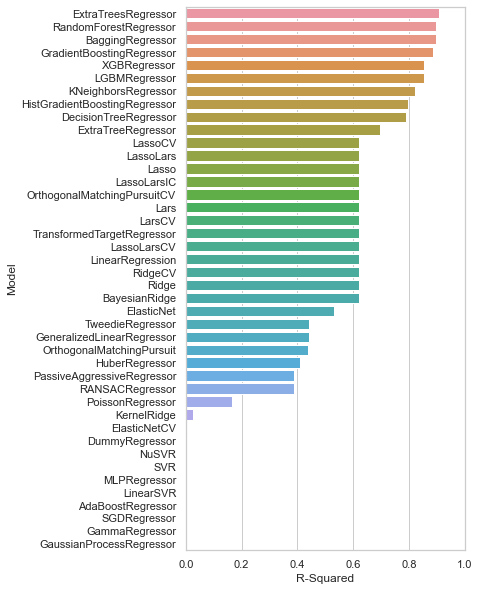

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
predictions_test["R-Squared"] = [0 if i < 0 else i for i in predictions_test.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))